# 2. Compare PostMLF: Negative Mode, All Features

In [32]:
import pandas as pd
import numpy as np
import os
import openpyxl

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


from itertools import combinations
from sklearn.decomposition import PCA
from scipy.stats import zscore, entropy, f_oneway, kruskal
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, jaccard_score
from scipy.spatial.distance import pdist, squareform
from sklearn.cross_decomposition import CCA
import prince


from sklearn.ensemble import IsolationForest

%matplotlib inline

In [33]:
# set the directory 
os.chdir('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results')

In [34]:
# Define the color palette for the sample types
sample_type_palette = {'Must': '#482677FF', 'PostAF': '#238A8DFF','PostMLF': '#74D055FF'}

In [35]:
df_wMetadata_cleaned_collapsed = pd.read_csv('Neg_All_OutlierRemoved.csv', index_col=0)
postMLF_df = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF']

In [36]:
postMLF_df.head()

,sample_type,year,plot,(+)-abscisic acid beta-D-glucopyranosyl ester,(+)-applanatumol Z5,(+)-daeschol A,(+)-discoipyrrole A,(+)-pestalachloride E,(+/-)-Gingerol,(+/-)12(13)-DiHOME,...,tipifarnib,"trans,trans-Muconic acid",trans-Aconitic acid,trichloroacetate anion,tropatepine,vincofos,{3-Oxo-2-[(2E)-5-sulfo-2-penten-1-yl]cyclopentyl}acetic acid,"α,α-Trehalose",α-hydroxyacetovanillone,β-D-Glucopyranuronic acid
Sample Name,,,,,,,,,,,,,,,,,,,,,
PostMLF_2021_Plot14,PostMLF,2021,Plot14,-0.409823,0.436209,-1.377229,-1.365638,0.630932,0.181479,0.312247,...,-0.741787,-0.568541,0.146780,-0.297924,-0.217299,0.135865,-0.765822,-0.393664,-0.601279,0.587509
PostMLF_2021_Plot9,PostMLF,2021,Plot9,-2.694210,0.606002,-0.698311,-1.317831,0.816151,-0.525405,0.441888,...,-0.707702,-0.574700,0.170079,-0.295703,-0.783060,-1.229383,-0.776330,-0.532719,-0.366476,0.328538
PostMLF_2021_Plot15,PostMLF,2021,Plot15,-1.483950,0.297455,-1.524913,-1.254231,0.680014,-0.532087,1.057656,...,-0.648200,-0.533724,0.691253,-0.570601,-0.151851,-0.806767,-0.706420,-0.189012,-0.599207,-0.554780
PostMLF_2021_Plot17,PostMLF,2021,Plot17,-2.260779,2.533365,-1.089288,-0.723035,0.102488,-0.354053,1.187763,...,-0.362174,0.695031,0.337864,-0.315359,0.183456,-1.110203,0.299857,-0.613299,-0.636694,0.808613
PostMLF_2021_Plot13,PostMLF,2021,Plot13,-1.506820,1.624642,-0.776772,0.050343,0.196445,-0.709438,1.152284,...,-0.228586,-0.584249,0.166982,-0.956405,1.111766,-0.533200,-0.792622,-0.743632,-0.758207,0.627574


## Clustermap

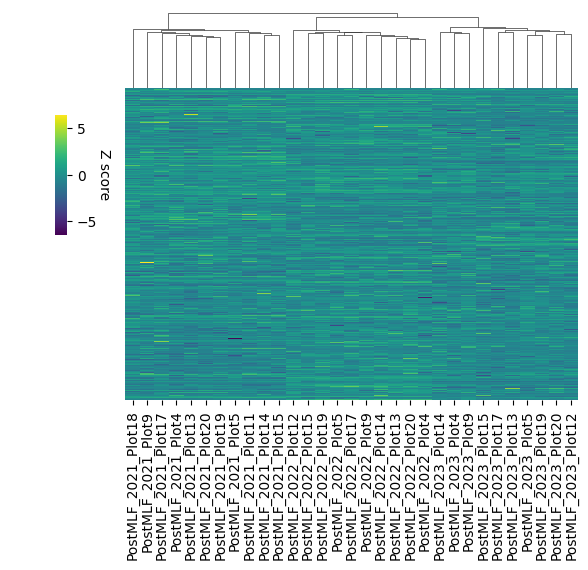

In [277]:
clustermap_df = postMLF_df.iloc[:, 3:].T

# Create clustermap
g = sns.clustermap(
    data=clustermap_df, 
    cmap="viridis", 
    col_cluster=True, 
    row_cluster=False, 
    xticklabels=True, 
    yticklabels=False, 
    figsize=(6, 6)
)

# Remove x-axis description
g.ax_heatmap.set_xlabel("")

# Label the legend
colorbar = g.ax_cbar
colorbar.set_ylabel("Z score", rotation=270, labelpad=10)

# Move legend closer
g.ax_cbar.set_position([0.1, 0.6, 0.02, 0.2])  # Adjust position (left, bottom, width, height)

plt.show()


## PCA plot

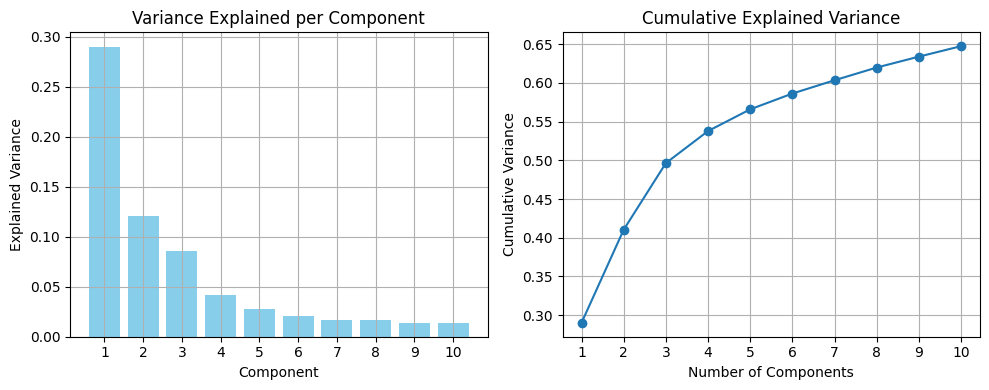

In [278]:
# Instantiate PCA with the max number of components to test
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA to your data
pca.fit(df_wMetadata_cleaned_collapsed.iloc[:, 3:])

# Create subplots for the explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot explained variance ratio (variance per component)
axes[0].bar(range(1, n_components + 1), pca.explained_variance_ratio_, color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Plot cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure the plots are displayed nicely
plt.tight_layout()
plt.show()

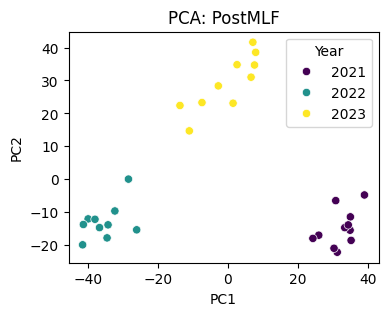

In [279]:
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(postMLF_df.iloc[:, 3:])

df_pca = postMLF_df[['sample_type', 'year', 'plot']].copy()
df_pca['PC1'], df_pca['PC2'] = pca_scores[:, 0], pca_scores[:, 1]

plt.figure(figsize=(4,3))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='year',  palette='viridis')
plt.title('PCA: PostMLF')
plt.legend(title='Year')
plt.show()


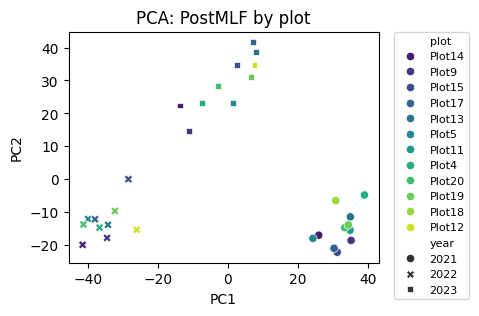

In [280]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='plot', style='year', palette='viridis')
plt.title('PCA: PostMLF by plot')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=8)
plt.show()

# PERMANOVA 

> note. the `LC-MS_metadata.csv` file is created in the `Metabolomics/LC-MS/01_LC-MS_Neg_All.ipynb` notebook

In [61]:
# Compute distance matrices
bray_curtis_matrix = squareform(pdist(postMLF_df.iloc[:, 3:], metric='braycurtis'))
jaccard_matrix = squareform(pdist(postMLF_df.iloc[:, 3:], metric='jaccard'))
cosine_matrix = squareform(pdist(postMLF_df.iloc[:, 3:], metric='cosine'))

# Convert to DataFrame with appropriate indexing
sample_ids = postMLF_df.index  # Assuming row indices correspond to sample IDs

bray_curtis_df = pd.DataFrame(bray_curtis_matrix, index=sample_ids, columns=sample_ids)
jaccard_df = pd.DataFrame(jaccard_matrix, index=sample_ids, columns=sample_ids)
cosine_df =  pd.DataFrame(cosine_matrix, index=sample_ids, columns=sample_ids)

# Save to TSV
bray_curtis_df.to_csv("Neg_All_BrayCurtis.tsv", sep="\t")
jaccard_df.to_csv("Neg_All_Jaccard.tsv", sep="\t")
cosine_df.to_csv("Neg_All_Cosine.tsv", sep="\t")

In [59]:
%%bash
Rscript /home/lfloerl/microterroir/Microbiome/Other_scripts/permanova.R Neg_All_BrayCurtis.tsv LC-MS_metadata.csv "year + plot"


PERMANOVA Results:
     Term        R2 Pr(>F)
     year 0.1898112  0.001
     plot 0.2238801  0.977
 Residual 0.5608890     NA
    Total 1.0000000     NA


In [60]:
%%bash
Rscript /home/lfloerl/microterroir/Microbiome/Other_scripts/permanova.R Neg_All_Jaccard.tsv LC-MS_metadata.csv "year + plot"


PERMANOVA Results:
     Term         R2 Pr(>F)
     year 0.03333333      1
     plot 0.36666667      1
 Residual 0.60000000     NA
    Total 1.00000000     NA


In [63]:
%%bash
Rscript /home/lfloerl/microterroir/Microbiome/Other_scripts/permanova.R Neg_All_Cosine.tsv LC-MS_metadata.csv "year + plot"


PERMANOVA Results:
     Term        R2 Pr(>F)
     year 0.2051171  0.001
     plot 0.2131080  0.990
 Residual 0.5552474     NA
    Total 1.0000000     NA


## Cluster: Are some plot reliably more similar to each other? 

In [281]:
# Identify plots that are present in every year
plots_per_year = postMLF_df.groupby("year")["plot"].unique().tolist()
common_plots = set(plots_per_year[0]).intersection(*plots_per_year[1:])  # Find common plots

# Subset the dataframe to only include common plots
df_filtered = postMLF_df[postMLF_df["plot"].isin(common_plots)].copy()

In [282]:
# Select only the metabolomics data (excluding metadata columns)
metadata_cols = ["sample_type", "year", "plot"]
df_metabolites = df_filtered.drop(columns=metadata_cols)
df_metabolites.shape

(27, 5048)

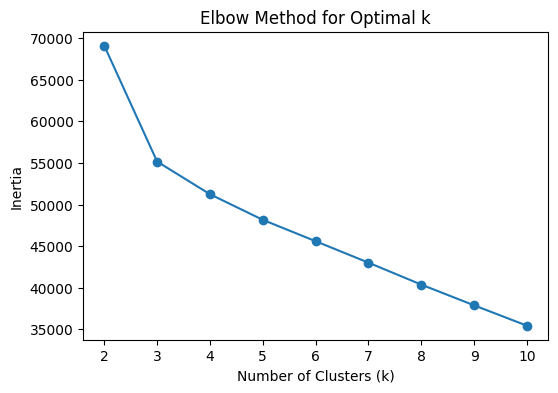

In [283]:
# Determine the number of clusters (k) using the Elbow Method
def optimal_k_elbow(data, max_k=10):
    inertia = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(range(2, max_k + 1), inertia, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()
# Run the elbow method to determine k
optimal_k_elbow(df_metabolites)

In [284]:
# Define the number of clusters
k_clusters = 3

# Ensure 'cluster' column exists as an integer type
df_filtered["cluster"] = -1  

# Apply K-means clustering for each year
for year in df_filtered["year"].unique():
    df_year = df_filtered[df_filtered["year"] == year]
    
    # Extract metabolite data
    df_year_metabolites = df_year.drop(columns=metadata_cols)
    
    # Handle missing values (optional: fill or drop)
    df_year_metabolites = df_year_metabolites.fillna(df_year_metabolites.median())

    # Fit K-means and assign cluster labels
    kmeans = KMeans(n_clusters=k_clusters, random_state=42, n_init=10)
    df_filtered.loc[df_year.index, "cluster"] = kmeans.fit_predict(df_year_metabolites).astype(int)


In [285]:
# Pivot table to see cluster assignments across years
contingency_table = pd.crosstab(df_filtered["plot"], [df_filtered["year"], df_filtered["cluster"]])
print("\nContingency Table:\n", contingency_table)


Contingency Table:
 year    2021       2022       2023      
cluster    0  1  2    0  1  2    0  1  2
plot                                    
Plot13     1  0  0    1  0  0    0  0  1
Plot14     0  0  1    1  0  0    1  0  0
Plot15     0  1  0    1  0  0    0  1  0
Plot17     1  0  0    0  1  0    0  1  0
Plot19     1  0  0    0  0  1    0  0  1
Plot20     1  0  0    1  0  0    0  1  0
Plot4      1  0  0    1  0  0    1  0  0
Plot5      0  1  0    0  1  0    1  0  0
Plot9      0  1  0    1  0  0    1  0  0


In [286]:
# Get sorted unique years
years = sorted(df_filtered["year"].unique())

# Compute ARI for all pairs of years
for year1, year2 in combinations(years, 2):
    year1_labels = df_filtered[df_filtered["year"] == year1]["cluster"]
    year2_labels = df_filtered[df_filtered["year"] == year2]["cluster"]
    
    # Compute ARI
    if len(year1_labels) == len(year2_labels):
        ari_score = adjusted_rand_score(year1_labels, year2_labels)
        print(f"\nAdjusted Rand Index (ARI) between {year1} and {year2}: {ari_score:.4f}")
    else:
        print(f"\nError: Mismatch in the number of plots between {year1} and {year2}.")



Adjusted Rand Index (ARI) between 2021 and 2022: 0.0255

Adjusted Rand Index (ARI) between 2021 and 2023: -0.2042

Adjusted Rand Index (ARI) between 2022 and 2023: -0.1688


In [287]:
# Get sorted unique years
years = sorted(df_filtered["year"].unique())

# Compute Jaccard similarity for all pairs of years
for year1, year2 in combinations(years, 2):
    year1_labels = df_filtered[df_filtered["year"] == year1]["cluster"]
    year2_labels = df_filtered[df_filtered["year"] == year2]["cluster"]

    # Compute Jaccard Similarity
    if len(year1_labels) == len(year2_labels):
        jaccard = jaccard_score(year1_labels, year2_labels, average="macro")
        print(f"Jaccard Similarity between {year1} and {year2}: {jaccard:.4f}")
    else:
        print(f"Error: Mismatch in the number of plots between {year1} and {year2}.")


Jaccard Similarity between 2021 and 2022: 0.1250
Jaccard Similarity between 2021 and 2023: 0.1619
Jaccard Similarity between 2022 and 2023: 0.1667


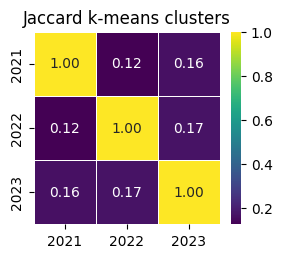

In [288]:
# Get sorted unique years
years = sorted(df_filtered["year"].unique())

# Create an empty similarity matrix
jaccard_matrix = pd.DataFrame(np.eye(len(years)), index=years, columns=years)

# Compute Jaccard similarity for all pairs of years
for year1, year2 in combinations(years, 2):
    year1_labels = df_filtered[df_filtered["year"] == year1]["cluster"]
    year2_labels = df_filtered[df_filtered["year"] == year2]["cluster"]

    # Compute Jaccard Similarity if lengths match
    if len(year1_labels) == len(year2_labels):
        jaccard = jaccard_score(year1_labels, year2_labels, average="macro")
        jaccard_matrix.loc[year1, year2] = jaccard
        jaccard_matrix.loc[year2, year1] = jaccard  # Fill symmetric value
    else:
        jaccard_matrix.loc[year1, year2] = np.nan
        jaccard_matrix.loc[year2, year1] = np.nan

# Plot heatmap
plt.figure(figsize=(3, 2.5))
sns.heatmap(jaccard_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Jaccard k-means clusters")
plt.show()


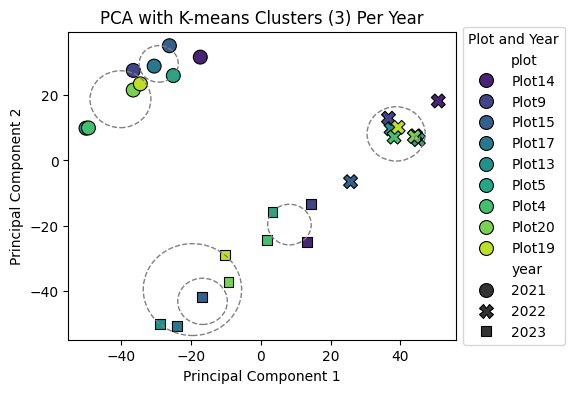

In [289]:
# Select only the metabolomics data (excluding metadata columns)
metadata_cols = ["sample_type", "year", "plot"]
df_metabolites = df_filtered.drop(columns=metadata_cols)

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_metabolites)

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Add PCA components to the original dataframe for visualization
df_filtered["PCA1"] = pca_result[:, 0]
df_filtered["PCA2"] = pca_result[:, 1]

# Ensure the 'cluster' column is categorical for correct plotting
df_filtered["cluster"] = df_filtered["cluster"].astype("category")

# Create a PCA plot colored by plot, and shape by year
plt.figure(figsize=(5, 4))

# Scatter plot with colors by plot, and shapes by year
sns.scatterplot(data=df_filtered, x="PCA1", y="PCA2", hue="plot", style="year", palette="viridis", s=100, edgecolor="k")

# Circle the clusters per year
for year in df_filtered["year"].unique():
    for cluster in df_filtered["cluster"].cat.categories:  # Loop through categorical clusters
        cluster_data = df_filtered[(df_filtered["year"] == year) & (df_filtered["cluster"] == cluster)]
        mean_x = cluster_data["PCA1"].mean()
        mean_y = cluster_data["PCA2"].mean()
        std_dev = cluster_data[["PCA1", "PCA2"]].std().mean()
            
        # Draw a circle around the cluster
        plt.gca().add_patch(plt.Circle((mean_x, mean_y), radius=std_dev, color="gray", fill=False, linestyle="--"))

plt.title("PCA with K-means Clusters (3) Per Year")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Move legend to the right side of the plot
plt.legend(title="Plot and Year", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


## What drives this? 

### CCA: Chemistry

In [ ]:
postMLF_df_reset = postMLF_df.reset_index()
postMLF_df_reset.head()

In [291]:
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/Raw-MD_Vineyard_MV_data.csv')
md["Plot_str"] = "Plot" + md["Plot"].astype(str)
md_wine_chemistry = md[['Plot_str', 'Year', 'Must_Oechsle', 'Wine_Tartatic_Acid', 
                        'Wine_Malic_Acid', 'Wine_Glucose', 'Wine_Fructose', 
                        'Wine_Lactic_Acid', 'Wien_Glycerol', 'Wine_Acetic_Acid']]

md_wine_chemistry.tail()

,Plot_str,Year,Must_Oechsle,Wine_Tartatic_Acid,Wine_Malic_Acid,Wine_Glucose,Wine_Fructose,Wine_Lactic_Acid,Wien_Glycerol,Wine_Acetic_Acid
29,Plot14,2023,80.0,2.15,0.15,0.72,2.03,1.16,6.12,1.63
30,Plot15,2023,71.0,2.65,0.13,0.61,1.04,0.78,4.79,2.21
31,Plot17,2023,75.0,2.36,0.16,0.97,2.34,1.04,5.76,1.72
32,Plot19,2023,66.0,1.44,0.08,0.48,0.56,1.14,4.98,0.80
33,Plot20,2023,76.0,2.24,0.08,0.46,0.81,0.89,5.70,0.82


In [292]:
df_merged = postMLF_df_reset.merge(md_wine_chemistry, left_on=["plot", "year"], right_on=["Plot_str", "Year"], how="inner")
df_merged = df_merged.drop(columns=['Plot_str', 'Year', 'sample_type'])

df_merged.head()

,Sample Name,year,plot,(+)-abscisic acid beta-D-glucopyranosyl ester,(+)-applanatumol Z5,(+)-daeschol A,(+)-discoipyrrole A,(+)-pestalachloride E,(+/-)-Gingerol,(+/-)12(13)-DiHOME,...,α-hydroxyacetovanillone,β-D-Glucopyranuronic acid,Must_Oechsle,Wine_Tartatic_Acid,Wine_Malic_Acid,Wine_Glucose,Wine_Fructose,Wine_Lactic_Acid,Wien_Glycerol,Wine_Acetic_Acid
0,PostMLF_2021_Plot14,2021,Plot14,-0.409823,0.436209,-1.377229,-1.365638,0.630932,0.181479,0.312247,...,-0.601279,0.587509,78.0,3.06,0.06,0.34,0.29,1.47,6.90,0.77
1,PostMLF_2021_Plot9,2021,Plot9,-2.694210,0.606002,-0.698311,-1.317831,0.816151,-0.525405,0.441888,...,-0.366476,0.328538,73.0,2.99,0.07,0.32,0.26,1.51,6.56,0.79
2,PostMLF_2021_Plot15,2021,Plot15,-1.483950,0.297455,-1.524913,-1.254231,0.680014,-0.532087,1.057656,...,-0.599207,-0.554780,73.0,3.43,0.07,0.33,0.30,1.69,6.29,0.75
3,PostMLF_2021_Plot17,2021,Plot17,-2.260779,2.533365,-1.089288,-0.723035,0.102488,-0.354053,1.187763,...,-0.636694,0.808613,73.0,3.06,0.15,0.42,0.29,1.79,7.24,0.81
4,PostMLF_2021_Plot13,2021,Plot13,-1.506820,1.624642,-0.776772,0.050343,0.196445,-0.709438,1.152284,...,-0.758207,0.627574,75.0,2.61,0.09,0.33,0.28,1.53,7.13,0.68


In [293]:
# Define the list of columns you want
metadata_cols = ['Sample Name', 'plot', 'year']
chemistry_features = ["Must_Oechsle", "Wine_Tartatic_Acid", "Wine_Malic_Acid", 
                      "Wine_Glucose", "Wine_Fructose", "Wine_Lactic_Acid", 
                      "Wien_Glycerol", "Wine_Acetic_Acid"]

# Separate columns for chemistry features and others
chemistry_data = df_merged[chemistry_features]  # Directly pass the list of column names
metabolomics_data = df_merged.drop(metadata_cols + chemistry_features, axis=1)  # Drop both metadata and chemistry columns

In [294]:
# Scale only the wine chemistry data
scaler_Y = StandardScaler()
chemistry_data_scaled = scaler_Y.fit_transform(chemistry_data)

cca = CCA(n_components=2)
Metabolites_c, Chemistry_c = cca.fit_transform(metabolomics_data, chemistry_data_scaled)

cca_df = pd.DataFrame({
    'CCA1_Metabolites': Metabolites_c[:, 0], 'CCA2_Metabolites': Metabolites_c[:, 1],
    'Plot': df_merged['plot'], 'Year': df_merged['year']})

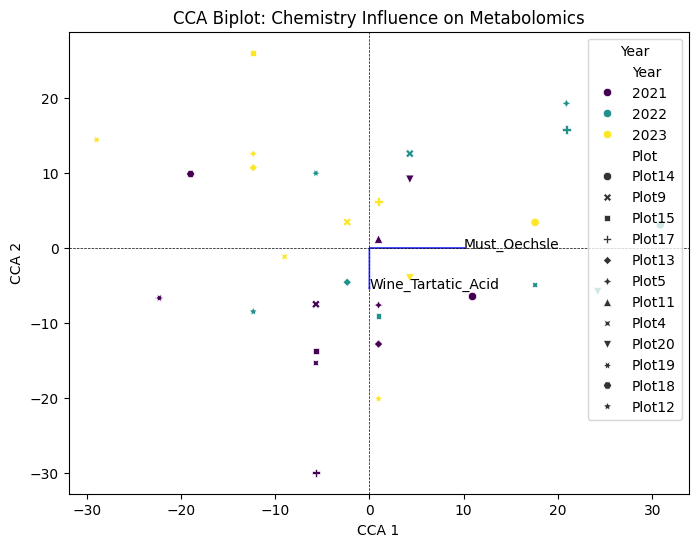

In [295]:
# Create Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatterplot of CCA sample scores
sns.scatterplot(data=cca_df, x='CCA1_Metabolites', y='CCA2_Metabolites', 
                hue='Year', style='Plot', palette='viridis', ax=ax)

# Plot arrows for chemistry variables (Use y_weights_ for chemistry data)
scaling_factor = 10  
for i, chem in enumerate(chemistry_features):  # Loop over the correct list of features
    if i < cca.y_weights_.shape[1]:  # Ensure we don’t go out of bounds
        ax.arrow(0, 0, cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                 color='blue', alpha=0.7, head_width=0.1)
        ax.text(cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                chem, color='black', fontsize=10)

# Labels and styling
ax.set_xlabel("CCA 1")
ax.set_ylabel("CCA 2")
ax.axhline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.axvline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.set_title("CCA Biplot: Chemistry Influence on Metabolomics")

plt.legend(title="Year", loc="upper right")
plt.show()

### CCA: Plot MD

In [296]:
md_plots = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux_plots.csv')
md_plots["Plot_str"] = "Plot" + md_plots["Plot"].astype(str)

md_plots_subset =  md_plots[['Plot_str', 'Altitude', 'Average_slope', 'Exposition', 'Average_radiation', 'Geology', 'Hydromorphie_code']]

# Convert categorical columns to dummy variables
categorical_cols = ['Exposition', 'Geology']
md_plots_subset_dummies = pd.get_dummies(md_plots_subset, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integers (0 or 1)
boolean_columns = md_plots_subset_dummies.select_dtypes(include='bool').columns
md_plots_subset_dummies[boolean_columns] = md_plots_subset_dummies[boolean_columns].astype(int)

md_plots_subset_dummies.head()

,Plot_str,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse
0,Plot4,450,30,937.5,1,1,0,0,1
1,Plot5,400,30,912.5,0,1,0,0,1
2,Plot9,520,35,887.5,0,1,0,0,1
3,Plot11,490,20,937.5,1,0,0,1,0
4,Plot12,520,15,937.5,1,1,1,0,0


In [297]:
df_merged = postMLF_df_reset.merge(md_plots_subset_dummies, left_on=["plot"], right_on=["Plot_str"], how="inner")
df_merged = df_merged.drop(columns=['Plot_str', 'year', 'sample_type'])

df_merged.head()

,Sample Name,plot,(+)-abscisic acid beta-D-glucopyranosyl ester,(+)-applanatumol Z5,(+)-daeschol A,(+)-discoipyrrole A,(+)-pestalachloride E,(+/-)-Gingerol,(+/-)12(13)-DiHOME,"(+/-)9,10-dihydroxy-12Z-octadecenoic acid",...,α-hydroxyacetovanillone,β-D-Glucopyranuronic acid,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse
0,PostMLF_2021_Plot14,Plot14,-0.409823,0.436209,-1.377229,-1.365638,0.630932,0.181479,0.312247,-1.415262,...,-0.601279,0.587509,440,25,912.5,1,0,0,0,0
1,PostMLF_2021_Plot9,Plot9,-2.694210,0.606002,-0.698311,-1.317831,0.816151,-0.525405,0.441888,-1.371653,...,-0.366476,0.328538,520,35,887.5,0,1,0,0,1
2,PostMLF_2021_Plot15,Plot15,-1.483950,0.297455,-1.524913,-1.254231,0.680014,-0.532087,1.057656,-1.437693,...,-0.599207,-0.554780,520,30,912.5,0,1,0,1,0
3,PostMLF_2021_Plot17,Plot17,-2.260779,2.533365,-1.089288,-0.723035,0.102488,-0.354053,1.187763,0.607546,...,-0.636694,0.808613,390,20,912.5,1,1,0,0,1
4,PostMLF_2021_Plot13,Plot13,-1.506820,1.624642,-0.776772,0.050343,0.196445,-0.709438,1.152284,0.579443,...,-0.758207,0.627574,580,30,937.5,1,1,0,0,1


In [298]:
# Define the list of columns you want
metadata_cols = ['Sample Name', 'plot']
plot_features = ['Altitude', 'Average_slope', 'Average_radiation',
       'Hydromorphie_code', 'Exposition_South-West', 'Geology_Colluvium',
       'Geology_Gravel_moraine', 'Geology_Molasse']

# Separate columns for chemistry features and others
plot_data = df_merged[plot_features]  # Directly pass the list of column names
metabolomics_data = df_merged.drop(metadata_cols + plot_features, axis=1)  # Drop both metadata and chemistry columns

In [299]:
# Scale only the wine chemistry data
scaler_Y = StandardScaler()
plot_data_scaled = scaler_Y.fit_transform(plot_data)

cca = CCA(n_components=2)
Metabolites_c, Chemistry_c = cca.fit_transform(metabolomics_data, plot_data_scaled)

cca_df = pd.DataFrame({
    'CCA1_Metabolites': Metabolites_c[:, 0], 'CCA2_Metabolites': Metabolites_c[:, 1],
    'Plot': df_merged['plot']})

cca_df.head()

,CCA1_Metabolites,CCA2_Metabolites,Plot
0,-7.503908,-21.846538,Plot14
1,8.004169,4.316045,Plot9
2,8.004169,1.650670,Plot15
3,-17.196457,-8.500232,Plot17
4,19.635227,-6.204969,Plot13


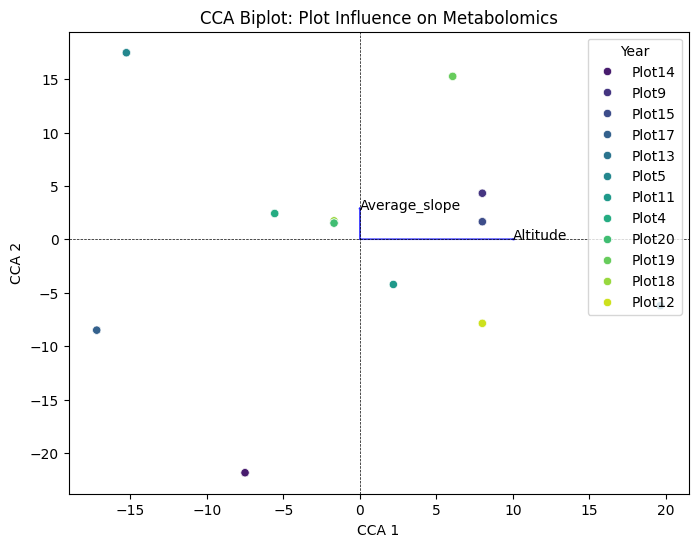

In [300]:
# Create Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatterplot of CCA sample scores
sns.scatterplot(data=cca_df, x='CCA1_Metabolites', y='CCA2_Metabolites', 
                hue='Plot', palette='viridis', ax=ax)

# Plot arrows for chemistry variables (Use y_weights_ for chemistry data)
scaling_factor = 10  
for i, chem in enumerate(plot_features):  # Loop over the correct list of features
    if i < cca.y_weights_.shape[1]:  # Ensure we don’t go out of bounds
        ax.arrow(0, 0, cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                 color='blue', alpha=0.7, head_width=0.1)
        ax.text(cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                chem, color='black', fontsize=10)

# Labels and styling
ax.set_xlabel("CCA 1")
ax.set_ylabel("CCA 2")
ax.axhline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.axvline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.set_title("CCA Biplot: Plot Influence on Metabolomics")

plt.legend(title="Year", loc="upper right")
plt.show()

### CCA: Climate

In [301]:
md_climate = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux-Climate.csv', index_col=0)
# Remove underscores from the 'Plot' column
md_climate['Plot'] = md_climate['Plot'].str.replace('_', '', regex=False)
#md_climate_subset = md_climate[['Plot', 'Year','average_rh', 'average_temperature', 'cv_rh', 'GDD', 'cv_temperature']]
md_climate_subset = md_climate[['Plot', 'Year','average_rh', 'average_temperature']]
md_climate_subset.head()

,Plot,Year,average_rh,average_temperature
0,Plot11,2021,71.948958,17.964399
1,Plot11,2022,NaN,NaN
2,Plot11,2023,65.129839,22.686518
3,Plot12,2021,72.753295,17.897069
4,Plot12,2022,63.602896,19.428428


In [302]:
df_merged_climate = postMLF_df_reset.merge(md_climate_subset, left_on=["plot", "year"], right_on=["Plot", "Year"], how="inner")
df_merged_climate = df_merged_climate.drop(columns=['Plot', 'year', 'sample_type'])
df_merged_climate = df_merged_climate.dropna()

In [303]:
# Define the list of columns you want
metadata_cols = ['Sample Name', 'Year', 'plot']
#climate_features = ['average_rh', 'average_temperature', 'cv_rh', 'GDD', 'cv_temperature']
climate_features = ['average_rh', 'average_temperature']


# Separate columns for chemistry features and others
climate_data = df_merged_climate[climate_features]  # Directly pass the list of column names
metabolomics_data = df_merged_climate.drop(metadata_cols + climate_features, axis=1)  # Drop both metadata and chemistry columns

In [327]:
scaler_X = StandardScaler()
metabolite_scaled = scaler_X.fit_transform(metabolomics_data)
scaler_Y = StandardScaler()
climate_data_scaled = scaler_Y.fit_transform(climate_data)

cca = CCA(n_components=2)
Metabolites_c, Cliamte_c = cca.fit_transform(metabolite_scaled, climate_data_scaled)

cca_df = pd.DataFrame({
    'CCA1_Metabolites': Metabolites_c[:, 0], 'CCA2_Metabolites': Metabolites_c[:, 1],
    'Plot': df_merged['plot'], 'Year': df_merged['Year']})

cca_df.head()

KeyError: 'Year'

ValueError: Could not interpret value `Year` for `hue`. An entry with this name does not appear in `data`.

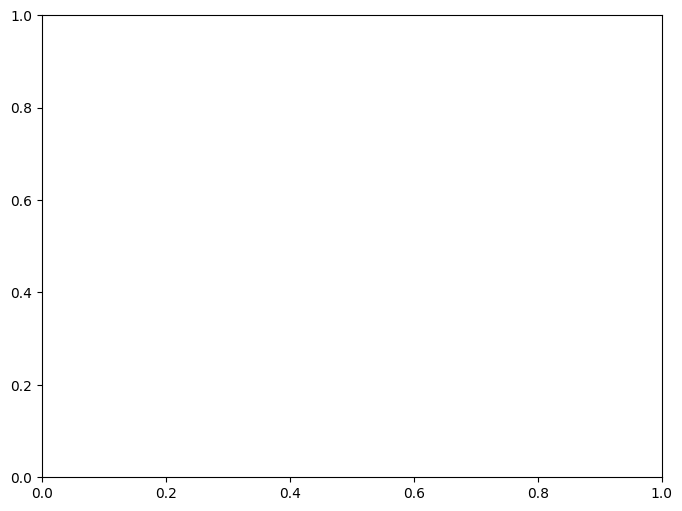

In [328]:
# Create Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatterplot of CCA sample scores
sns.scatterplot(data=cca_df, x='CCA1_Metabolites', y='CCA2_Metabolites', 
                hue='Year', palette='viridis', ax=ax)

# Plot arrows for chemistry variables (Use y_weights_ for chemistry data)
scaling_factor = 10  
for i, chem in enumerate(climate_features):  # Loop over the correct list of features
    if i < cca.y_weights_.shape[1]:  # Ensure we don’t go out of bounds
        ax.arrow(0, 0, cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                 color='blue', alpha=0.7, head_width=0.1)
        ax.text(cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                chem, color='black', fontsize=10)

# Labels and styling
ax.set_xlabel("CCA 1")
ax.set_ylabel("CCA 2")
ax.axhline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.axvline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.set_title("CCA Biplot: Climate on Metabolomics")

plt.legend(title="Year", loc="upper right")
plt.show()

##### PCA-CCA 

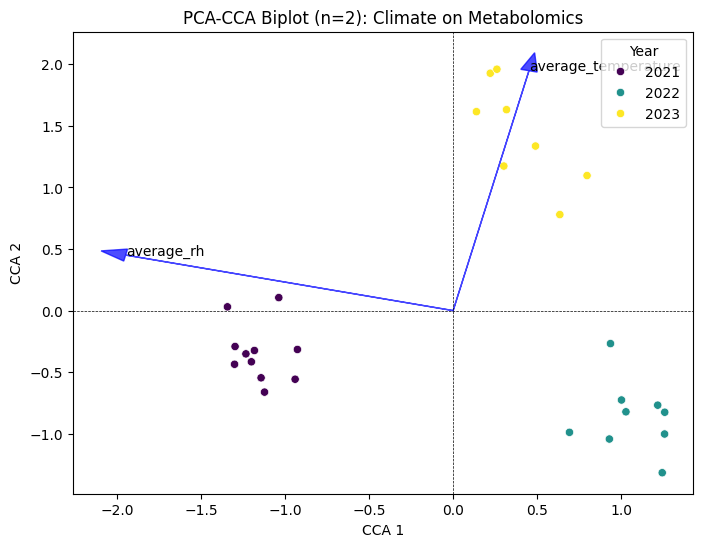

Canonical Correlations (between CCA1 and CCA2):
[[ 9.82490877e-01 -1.00598518e-16]
 [ 6.44434112e-06  1.29256126e-01]]
Explained variance for Metabolites:  [0.00019102 0.00019102]
Explained variance for Climate:  [0.60134377 0.26424196]


In [ ]:
pca = PCA(n_components=2)  # or however many components you want
metabolite_pca = pca.fit_transform(metabolite_scaled)

cca = CCA(n_components=2)
Metabolites_c, Climate_c = cca.fit_transform(metabolite_pca, climate_data_scaled)


cca_df_pca = pd.DataFrame({
    'CCA1_Metabolites': Metabolites_c[:, 0], 'CCA2_Metabolites': Metabolites_c[:, 1],
    'Plot': df_merged['plot'], 'Year': df_merged['Year']})

# Create Biplot
fig, ax = plt.subplots(figsize=(8, 6))


# Scatterplot of CCA sample scores
sns.scatterplot(data=cca_df_pca, x='CCA1_Metabolites', y='CCA2_Metabolites', 
                hue='Year', palette='viridis', ax=ax)

# Plot arrows for chemistry variables (Use y_weights_ for chemistry data)
scaling_factor = 2  
for i, chem in enumerate(climate_features):  # Loop over the correct list of features
    if i < cca.y_weights_.shape[1]:  # Ensure we don’t go out of bounds
        ax.arrow(0, 0, cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                 color='blue', alpha=0.7, head_width=0.1)
        ax.text(cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                chem, color='black', fontsize=10)

# Labels and styling
ax.set_xlabel("CCA 1")
ax.set_ylabel("CCA 2")
ax.axhline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.axvline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.set_title("PCA-CCA Biplot (n=2): Climate on Metabolomics")

plt.legend(title="Year", loc="upper right")
plt.show()

# Calculate canonical correlation coefficients
corr_metabolites = np.corrcoef(Metabolites_c.T, Climate_c.T)[:Metabolites_c.shape[1], Metabolites_c.shape[1]:]
print("Canonical Correlations (between CCA1 and CCA2):")
print(corr_metabolites)

# Explained variance for Metabolomics and Climate data in CCA
explained_variance_metabolites = np.var(Metabolites_c, axis=0) / np.var(metabolite_scaled, axis=0).sum()
explained_variance_climate = np.var(Climate_c, axis=0) / np.var(climate_data_scaled, axis=0).sum()

print("Explained variance for Metabolites: ", explained_variance_metabolites)
print("Explained variance for Climate: ", explained_variance_climate)


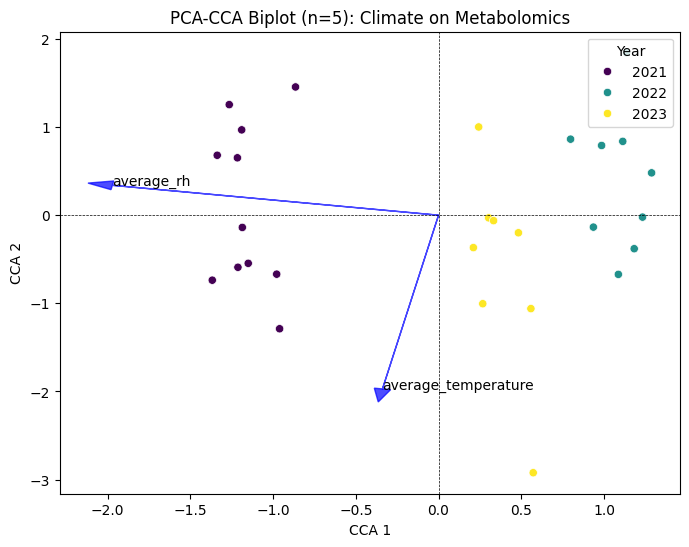

Canonical Correlations (between CCA1 and CCA2):
[[ 9.85256383e-01  8.28753971e-17]
 [-8.25770337e-05  5.20610600e-01]]
Explained variance for Metabolites:  [0.00019102 0.00019102]
Explained variance for Climate:  [0.57273749 0.27743995]


In [ ]:
pca = PCA(n_components=5)  # or however many components you want
metabolite_pca = pca.fit_transform(metabolite_scaled)

cca = CCA(n_components=2)
Metabolites_c, Climate_c = cca.fit_transform(metabolite_pca, climate_data_scaled)


cca_df_pca = pd.DataFrame({
    'CCA1_Metabolites': Metabolites_c[:, 0], 'CCA2_Metabolites': Metabolites_c[:, 1],
    'Plot': df_merged['plot'], 'Year': df_merged['Year']})

# Create Biplot
fig, ax = plt.subplots(figsize=(8, 6))


# Scatterplot of CCA sample scores
sns.scatterplot(data=cca_df_pca, x='CCA1_Metabolites', y='CCA2_Metabolites', 
                hue='Year', palette='viridis', ax=ax)

# Plot arrows for chemistry variables (Use y_weights_ for chemistry data)
scaling_factor = 2  
for i, chem in enumerate(climate_features):  # Loop over the correct list of features
    if i < cca.y_weights_.shape[1]:  # Ensure we don’t go out of bounds
        ax.arrow(0, 0, cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                 color='blue', alpha=0.7, head_width=0.1)
        ax.text(cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                chem, color='black', fontsize=10)

# Labels and styling
ax.set_xlabel("CCA 1")
ax.set_ylabel("CCA 2")
ax.axhline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.axvline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.set_title("PCA-CCA Biplot (n=5): Climate on Metabolomics")

plt.legend(title="Year", loc="upper right")
plt.show()

# Calculate canonical correlation coefficients
corr_metabolites = np.corrcoef(Metabolites_c.T, Climate_c.T)[:Metabolites_c.shape[1], Metabolites_c.shape[1]:]
print("Canonical Correlations (between CCA1 and CCA2):")
print(corr_metabolites)

# Explained variance for Metabolomics and Climate data in CCA
explained_variance_metabolites = np.var(Metabolites_c, axis=0) / np.var(metabolite_scaled, axis=0).sum()
explained_variance_climate = np.var(Climate_c, axis=0) / np.var(climate_data_scaled, axis=0).sum()

print("Explained variance for Metabolites: ", explained_variance_metabolites)
print("Explained variance for Climate: ", explained_variance_climate)

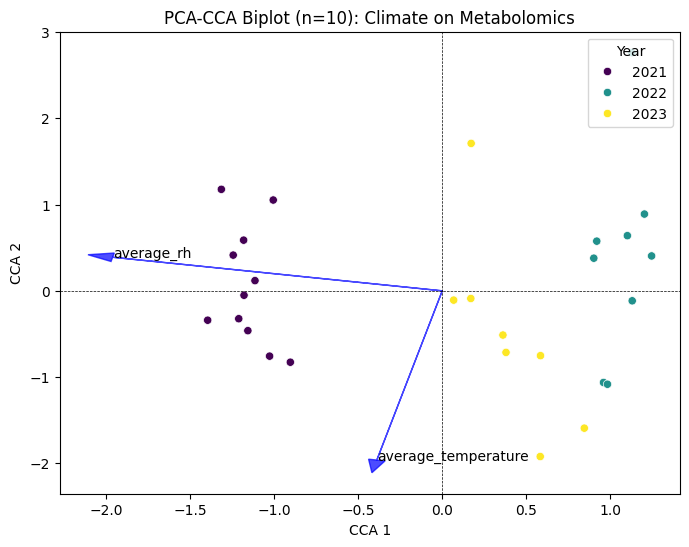

Canonical Correlations (between CCA1 and CCA2):
[[ 9.90226474e-01 -2.03295175e-17]
 [-2.12116765e-04  6.22507505e-01]]
Explained variance for Metabolites:  [0.00019102 0.00019102]
Explained variance for Climate:  [0.58575043 0.27127639]


In [ ]:
pca = PCA(n_components=10)  # or however many components you want
metabolite_pca = pca.fit_transform(metabolite_scaled)

cca = CCA(n_components=2)
Metabolites_c, Climate_c = cca.fit_transform(metabolite_pca, climate_data_scaled)


cca_df_pca = pd.DataFrame({
    'CCA1_Metabolites': Metabolites_c[:, 0], 'CCA2_Metabolites': Metabolites_c[:, 1],
    'Plot': df_merged['plot'], 'Year': df_merged['Year']})

# Create Biplot
fig, ax = plt.subplots(figsize=(8, 6))


# Scatterplot of CCA sample scores
sns.scatterplot(data=cca_df_pca, x='CCA1_Metabolites', y='CCA2_Metabolites', 
                hue='Year', palette='viridis', ax=ax)

# Plot arrows for chemistry variables (Use y_weights_ for chemistry data)
scaling_factor = 2  
for i, chem in enumerate(climate_features):  # Loop over the correct list of features
    if i < cca.y_weights_.shape[1]:  # Ensure we don’t go out of bounds
        ax.arrow(0, 0, cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                 color='blue', alpha=0.7, head_width=0.1)
        ax.text(cca.y_weights_[0, i] * scaling_factor, cca.y_weights_[1, i] * scaling_factor, 
                chem, color='black', fontsize=10)

# Labels and styling
ax.set_xlabel("CCA 1")
ax.set_ylabel("CCA 2")
ax.axhline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.axvline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.set_title("PCA-CCA Biplot (n=10): Climate on Metabolomics")

plt.legend(title="Year", loc="upper right")
plt.show()

# Calculate canonical correlation coefficients
corr_metabolites = np.corrcoef(Metabolites_c.T, Climate_c.T)[:Metabolites_c.shape[1], Metabolites_c.shape[1]:]
print("Canonical Correlations (between CCA1 and CCA2):")
print(corr_metabolites)

# Explained variance for Metabolomics and Climate data in CCA
explained_variance_metabolites = np.var(Metabolites_c, axis=0) / np.var(metabolite_scaled, axis=0).sum()
explained_variance_climate = np.var(Climate_c, axis=0) / np.var(climate_data_scaled, axis=0).sum()

print("Explained variance for Metabolites: ", explained_variance_metabolites)
print("Explained variance for Climate: ", explained_variance_climate)

##### PLS

In [65]:
from sklearn.cross_decomposition import PLSCanonical

pls = PLSCanonical(n_components=2)
Metabolites_p, Climate_p = pls.fit_transform(metabolite_scaled, climate_data_scaled)

pls_df = pd.DataFrame({
    'CCA1_Metabolites': Metabolites_p[:, 0], 'CCA2_Metabolites': Metabolites_p[:, 1],
    'Plot': df_merged['plot'], 'Year': df_merged['Year']})

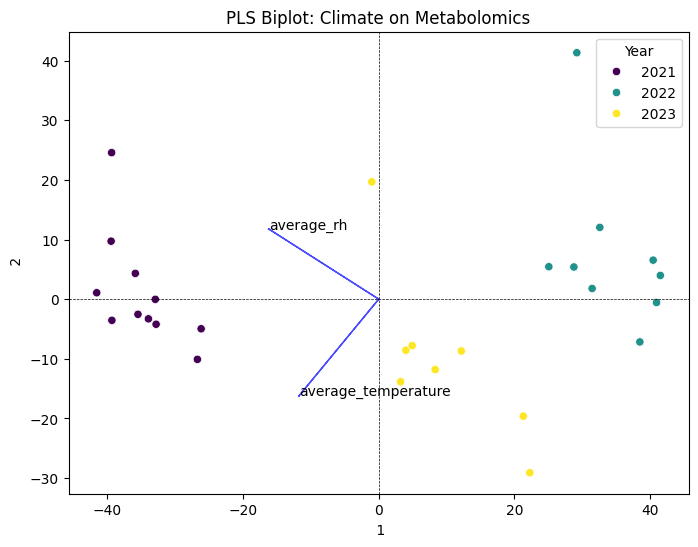

In [ ]:
# Create Biplot
fig, ax = plt.subplots(figsize=(8, 6))


# Scatterplot of CCA sample scores
sns.scatterplot(data=pls_df, x='CCA1_Metabolites', y='CCA2_Metabolites', 
                hue='Year', palette='viridis', ax=ax)

# Plot arrows for chemistry variables (Use y_weights_ for chemistry data)
scaling_factor = 20 
for i, chem in enumerate(climate_features):  # Loop over the correct list of features
    if i < pls.y_weights_.shape[1]:  # Ensure we don’t go out of bounds
        ax.arrow(0, 0, pls.y_weights_[0, i] * scaling_factor, pls.y_weights_[1, i] * scaling_factor, 
                 color='blue', alpha=0.7, head_width=0.1)
        ax.text(pls.y_weights_[0, i] * scaling_factor, pls.y_weights_[1, i] * scaling_factor, 
                chem, color='black', fontsize=10)

# Labels and styling
ax.set_xlabel(" 1")
ax.set_ylabel(" 2")
ax.axhline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.axvline(0, color="black", linewidth=0.5, linestyle="dashed")
ax.set_title("PLS Biplot: Climate on Metabolomics")

plt.legend(title="Year", loc="upper right")
plt.show()

## MFA 

In [7]:
postMLF_df_reset = postMLF_df.reset_index()
postMLF_df_reset.head()

,Sample Name,sample_type,year,plot,(+)-abscisic acid beta-D-glucopyranosyl ester,(+)-applanatumol Z5,(+)-daeschol A,(+)-discoipyrrole A,(+)-pestalachloride E,(+/-)-Gingerol,...,tipifarnib,"trans,trans-Muconic acid",trans-Aconitic acid,trichloroacetate anion,tropatepine,vincofos,{3-Oxo-2-[(2E)-5-sulfo-2-penten-1-yl]cyclopentyl}acetic acid,"α,α-Trehalose",α-hydroxyacetovanillone,β-D-Glucopyranuronic acid
0,PostMLF_2021_Plot14,PostMLF,2021,Plot14,-0.409823,0.436209,-1.377229,-1.365638,0.630932,0.181479,...,-0.741787,-0.568541,0.146780,-0.297924,-0.217299,0.135865,-0.765822,-0.393664,-0.601279,0.587509
1,PostMLF_2021_Plot9,PostMLF,2021,Plot9,-2.694210,0.606002,-0.698311,-1.317831,0.816151,-0.525405,...,-0.707702,-0.574700,0.170079,-0.295703,-0.783060,-1.229383,-0.776330,-0.532719,-0.366476,0.328538
2,PostMLF_2021_Plot15,PostMLF,2021,Plot15,-1.483950,0.297455,-1.524913,-1.254231,0.680014,-0.532087,...,-0.648200,-0.533724,0.691253,-0.570601,-0.151851,-0.806767,-0.706420,-0.189012,-0.599207,-0.554780
3,PostMLF_2021_Plot17,PostMLF,2021,Plot17,-2.260779,2.533365,-1.089288,-0.723035,0.102488,-0.354053,...,-0.362174,0.695031,0.337864,-0.315359,0.183456,-1.110203,0.299857,-0.613299,-0.636694,0.808613
4,PostMLF_2021_Plot13,PostMLF,2021,Plot13,-1.506820,1.624642,-0.776772,0.050343,0.196445,-0.709438,...,-0.228586,-0.584249,0.166982,-0.956405,1.111766,-0.533200,-0.792622,-0.743632,-0.758207,0.627574


In [8]:
#### 1. MERGE ALL 

# CHEMISTRY
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/Raw-MD_Vineyard_MV_data.csv')
md["Plot_str"] = "Plot" + md["Plot"].astype(str)
md_wine_chemistry = md[['Plot_str', 'Year', 'Must_Oechsle', 'Wine_Tartatic_Acid', 
                        'Wine_Malic_Acid', 'Wine_Glucose', 'Wine_Fructose', 
                        'Wine_Lactic_Acid', 'Wien_Glycerol', 'Wine_Acetic_Acid']]

df_merged = postMLF_df_reset.merge(md_wine_chemistry, left_on=["plot", "year"], right_on=["Plot_str", "Year"], how="inner")
df_merged = df_merged.drop(columns=['Plot_str', 'Year', 'sample_type'])


# PLOTS
md_plots = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux_plots.csv')
md_plots["Plot_str"] = "Plot" + md_plots["Plot"].astype(str)
md_plots_subset =  md_plots[['Plot_str', 'Altitude', 'Average_slope', 'Exposition', 'Average_radiation', 'Geology', 'Hydromorphie_code']]
# Convert categorical columns to dummy variables
categorical_cols = ['Exposition', 'Geology']
md_plots_subset_dummies = pd.get_dummies(md_plots_subset, columns=categorical_cols, drop_first=True)
# Convert boolean columns to integers (0 or 1)
boolean_columns = md_plots_subset_dummies.select_dtypes(include='bool').columns
md_plots_subset_dummies[boolean_columns] = md_plots_subset_dummies[boolean_columns].astype(int)

df_merged = df_merged.merge(md_plots_subset_dummies, left_on=["plot"], right_on=["Plot_str"], how="inner")
df_merged = df_merged.drop(columns=['Plot_str'])


# CLIMATE
md_climate = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux-Climate.csv', index_col=0)
# Remove underscores from the 'Plot' column
md_climate['Plot'] = md_climate['Plot'].str.replace('_', '', regex=False)
md_climate_subset = md_climate[['Plot', 'Year','average_rh', 'average_temperature']]

df_merged_all = df_merged.merge(md_climate_subset, left_on=["plot", "year"], right_on=["Plot", "Year"], how="inner")
df_merged_all = df_merged_all.drop(columns=['Plot', 'Year'])
df_merged_all = df_merged_all.dropna()


# Keep track of the columns' origins
metabolites_columns = postMLF_df_reset.iloc[:, 4:].columns.tolist()
wine_chemistry_columns = md_wine_chemistry.iloc[:, 2:].columns.tolist()
plots_columns = md_plots_subset_dummies.iloc[:, 1:].columns.tolist()
climate_columns = md_climate_subset.iloc[:, 2:].columns.tolist()
metadata_columns = ['Sample Name', 'year', 'plot']

df_merged_all.head()

,Sample Name,year,plot,(+)-abscisic acid beta-D-glucopyranosyl ester,(+)-applanatumol Z5,(+)-daeschol A,(+)-discoipyrrole A,(+)-pestalachloride E,(+/-)-Gingerol,(+/-)12(13)-DiHOME,...,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse,average_rh,average_temperature
0,PostMLF_2021_Plot14,2021,Plot14,-0.409823,0.436209,-1.377229,-1.365638,0.630932,0.181479,0.312247,...,440,25,912.5,1,0,0,0,0,70.767447,18.343627
1,PostMLF_2021_Plot9,2021,Plot9,-2.694210,0.606002,-0.698311,-1.317831,0.816151,-0.525405,0.441888,...,520,35,887.5,0,1,0,0,1,73.022541,17.902585
2,PostMLF_2021_Plot15,2021,Plot15,-1.483950,0.297455,-1.524913,-1.254231,0.680014,-0.532087,1.057656,...,520,30,912.5,0,1,0,1,0,72.104023,17.892713
3,PostMLF_2021_Plot17,2021,Plot17,-2.260779,2.533365,-1.089288,-0.723035,0.102488,-0.354053,1.187763,...,390,20,912.5,1,1,0,0,1,72.076768,18.476535
4,PostMLF_2021_Plot13,2021,Plot13,-1.506820,1.624642,-0.776772,0.050343,0.196445,-0.709438,1.152284,...,580,30,937.5,1,1,0,0,1,71.334895,17.544612


In [9]:
# Create a multi-index column structure
multi_index_columns = (
    [('Metabolites', col) for col in metabolites_columns] +
    [('Wine Chemistry', col) for col in wine_chemistry_columns] +
    [('Plots', col) for col in plots_columns] +
    [('Climate', col) for col in climate_columns]
)

# Subset data and assign multi-index
df_metadata = df_merged_all[metadata_columns]  # Keep metadata separately
df_mfa = df_merged_all.drop(columns=metadata_columns)  # Drop metadata
df_mfa.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index

# Extract the group names (first level of multi-index)
groups = df_mfa.columns.levels[0].tolist()
groups

['Climate', 'Metabolites', 'Plots', 'Wine Chemistry']

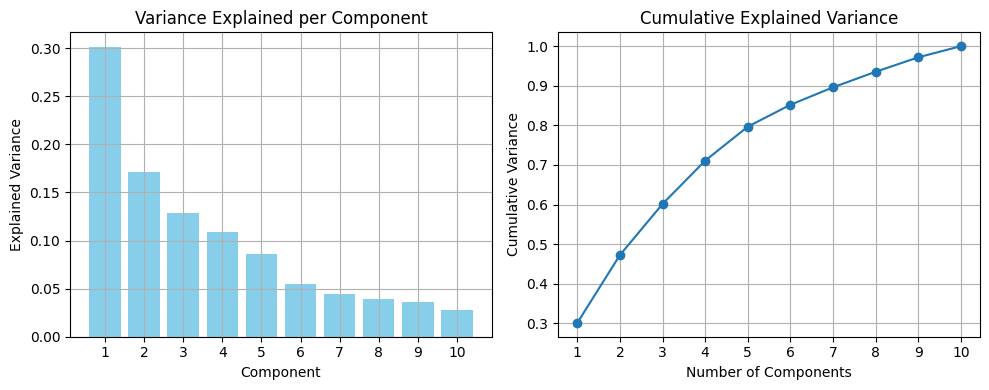

In [10]:
# Define the number of components to test
n_components = 10

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  # Use 10 components
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()


In [11]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.739,23.90%,23.90%
1,1.558,13.59%,37.49%
2,1.171,10.22%,47.71%
3,0.994,8.67%,56.38%
4,0.780,6.81%,63.19%


In [12]:
contributions = mfa.column_contributions_
contributions

component,0,1,2,3,4
variable,,,,,
"(Climate, average_rh)",0.208948,0.004712,0.019652,0.015227,7.979178e-05
"(Climate, average_temperature)",0.127460,0.091362,0.000862,0.024270,5.140396e-03
"(Metabolites, (+)-abscisic acid beta-D-glucopyranosyl ester)",0.000282,0.000015,0.000004,0.000030,2.204456e-05
"(Metabolites, (+)-applanatumol Z5)",0.000063,0.000116,0.000014,0.000159,1.280008e-06
"(Metabolites, (+)-daeschol A)",0.000213,0.000001,0.000008,0.000001,4.805349e-07
...,...,...,...,...,...
"(Wine Chemistry, Wine_Glucose)",0.007303,0.089381,0.076007,0.004020,2.533135e-04
"(Wine Chemistry, Wine_Fructose)",0.000563,0.099862,0.050276,0.000671,4.504073e-03
"(Wine Chemistry, Wine_Lactic_Acid)",0.081533,0.000867,0.006199,0.014533,6.329534e-04


In [13]:
mfa_results.head()

,0,1,2,3,4,Sample Name,year,plot
0,1.046446,0.332344,-1.270261,-0.421331,-1.199277,PostMLF_2021_Plot14,2021,Plot14
1,1.768461,-0.678584,0.139108,-1.286695,0.739549,PostMLF_2021_Plot9,2021,Plot9
2,1.841006,-1.127567,0.032777,0.042171,-0.378405,PostMLF_2021_Plot15,2021,Plot15
3,1.711119,1.140761,-0.679530,-1.146624,0.620057,PostMLF_2021_Plot17,2021,Plot17
4,1.854373,-0.061475,-0.933238,0.279460,1.423656,PostMLF_2021_Plot13,2021,Plot13


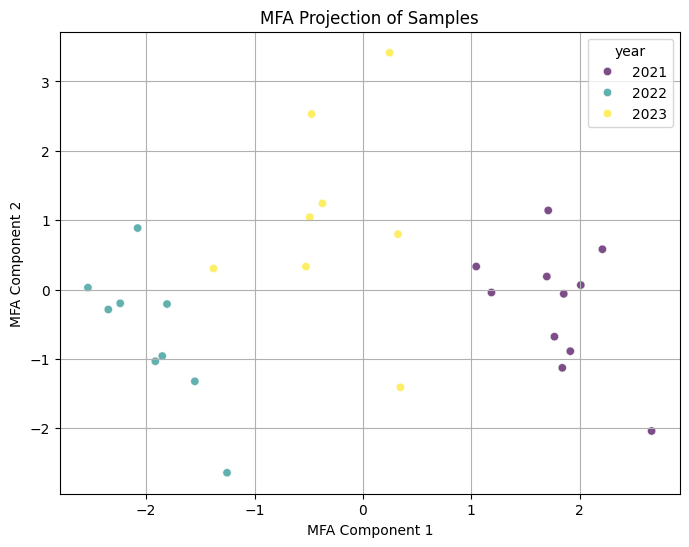

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

In [15]:
mfa.plot(
    df_mfa,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [16]:
mfa['Climate'].eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,1.563,78.13%,78.13%
1,0.437,21.87%,100.00%


In [17]:
mfa['Metabolites'].eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,"1,011.986",19.98%,19.98%
1,603.636,11.92%,31.90%
2,380.516,7.51%,39.42%
3,211.508,4.18%,43.59%
4,190.333,3.76%,47.35%


In [18]:
mfa['Plots'].eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.643,33.04%,33.04%
1,1.951,24.38%,57.42%
2,1.383,17.29%,74.71%
3,0.683,8.54%,83.25%
4,0.566,7.08%,90.33%


In [19]:
mfa['Wine Chemistry'].eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.718,46.48%,46.48%
1,2.495,31.18%,77.66%
2,0.897,11.21%,88.87%
3,0.350,4.38%,93.25%
4,0.250,3.12%,96.38%


In [20]:
mfa.column_correlations

component,0,1,2,3,4
variable,,,,,
"(Climate, average_rh)",0.945650,0.107106,-0.189638,-0.153753,0.009864
"(Climate, average_temperature)",-0.738581,0.471640,-0.039716,-0.194112,0.079170
"(Metabolites, (+)-abscisic acid beta-D-glucopyranosyl ester)",-0.884647,0.151616,0.065372,0.175063,-0.131943
"(Metabolites, (+)-applanatumol Z5)",0.418763,0.426808,0.130961,-0.399757,0.031794
"(Metabolites, (+)-daeschol A)",-0.768646,-0.046100,0.095546,-0.033224,0.019480
...,...,...,...,...,...
"(Wine Chemistry, Wine_Glucose)",0.272717,0.719631,0.575322,0.121865,-0.027111
"(Wine Chemistry, Wine_Fructose)",-0.075713,0.760656,0.467911,0.049795,-0.114321
"(Wine Chemistry, Wine_Lactic_Acid)",0.911245,0.070884,-0.164302,-0.231718,-0.042856


In [21]:
mfa.column_correlations.iloc[:, :2]

component,0,1
variable,,
"(Climate, average_rh)",0.945650,0.107106
"(Climate, average_temperature)",-0.738581,0.471640
"(Metabolites, (+)-abscisic acid beta-D-glucopyranosyl ester)",-0.884647,0.151616
"(Metabolites, (+)-applanatumol Z5)",0.418763,0.426808
"(Metabolites, (+)-daeschol A)",-0.768646,-0.046100
...,...,...
"(Wine Chemistry, Wine_Glucose)",0.272717,0.719631
"(Wine Chemistry, Wine_Fructose)",-0.075713,0.760656
"(Wine Chemistry, Wine_Lactic_Acid)",0.911245,0.070884


In [25]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df.tail()

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution
4902,"(Metabolites, mz777.3769_RT7.18)",-0.005369,-0.008107,0.013476
1797,"(Metabolites, mz268.9728_RT7.18)",-0.005369,-0.008107,0.013476
3321,"(Metabolites, mz432.7699_RT3.36)",-0.005022,-0.004637,0.009659
1085,"(Metabolites, mz1009.4297_RT7.18)",-0.001797,0.003770,0.005567
3934,"(Metabolites, mz504.7528_RT7.20)",0.003020,-0.001509,0.004528


In [26]:
# Extract the first element of the tuple as the 'group'
variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

# Filter out 'Metabolites'
filtered_loadings_df = variable_loadings_df[variable_loadings_df["group"] != "Metabolites"]

# Select top 20 based on Loadings Contribution
top_loadings = filtered_loadings_df.nlargest(15, "Loadings Contribution")
top_loadings['Variable'] = top_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

top_loadings

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
1,'average_temperature',-0.738581,0.471640,1.210222,Climate
5075,'Wine_Tartatic_Acid',0.922206,0.145214,1.067419,Wine Chemistry
0,'average_rh',0.945650,0.107106,1.052756,Climate
5080,'Wien_Glycerol',0.861843,0.178476,1.040319,Wine Chemistry
5076,'Wine_Malic_Acid',0.301352,0.713788,1.015140,Wine Chemistry
5077,'Wine_Glucose',0.272717,0.719631,0.992348,Wine Chemistry
5079,'Wine_Lactic_Acid',0.911245,0.070884,0.982129,Wine Chemistry
5081,'Wine_Acetic_Acid',0.361566,0.537966,0.899532,Wine Chemistry
5074,'Must_Oechsle',-0.523284,0.354319,0.877603,Wine Chemistry
5072,'Geology_Gravel_moraine',0.300916,-0.542078,0.842995,Plots


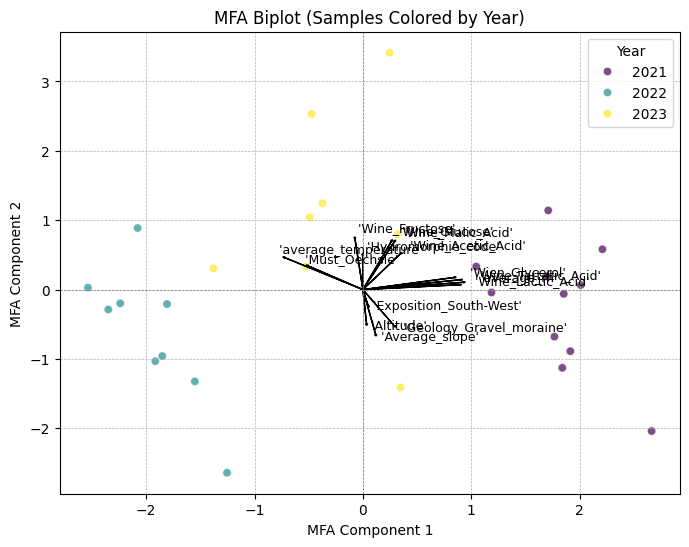

In [27]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)


# Define a scaling factor to extend the arrows
scaling_factor = 1 # Adjust this value to control arrow length
# Plot the top loadings as arrows
for i, row in top_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)


# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Samples Colored by Year)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

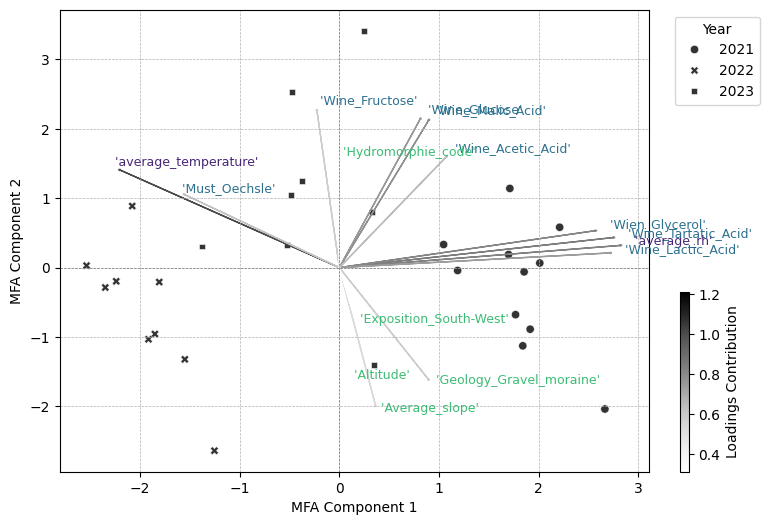

In [28]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], style="year", alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  # Adjust this value to control arrow length

# Create a color map based on the group and intensity (Total Contribution)
group_colors = {'Climate': '#482677FF', 'Wine Chemistry': '#2D718EFF', 'Plots': '#3CBC75FF'}  # Define custom colors for each group
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  # Normalize based on Loadings Contribution
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])

# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    # Color based on group
    group_color = group_colors.get(row['group'], 'black')  # Default to black if group is not found
    # Scale the arrow by Loadings Contribution
    intensity = norm(row['Loadings Contribution'])
    
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=sm.to_rgba(intensity), length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9, color=group_color)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")

# Add colorbar for Loadings Contribution intensity
cbar = fig.colorbar(sm, ax=ax, fraction=0.01, pad=0.04, location='right')
cbar.ax.set_position([0.9, 0.11, 0.7, 0.3]) 
cbar.set_label("Loadings Contribution")

# Show grid and legend
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1.2, 1))

plt.show()


/scratch/lfloerl/tmpdata/ipykernel_2446057/184578375.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group_influence.reset_index(), x="group", y="Total Influence", palette="viridis")


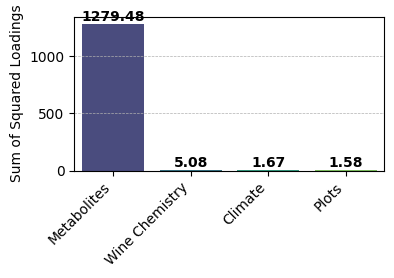

In [29]:
# Compute the total influence per group as the sum of squared loadings
group_influence = variable_loadings_df.groupby("group")[["MFA Comp 1", "MFA Comp 2"]].apply(lambda x: (x**2).sum())

# Sort to see which groups contribute the most
group_influence = group_influence.sort_values(by=["MFA Comp 1", "MFA Comp 2"], ascending=False)

# Compute total influence per group
group_influence["Total Influence"] = group_influence["MFA Comp 1"] + group_influence["MFA Comp 2"]

# Sort groups by total influence
group_influence = group_influence.sort_values(by="Total Influence", ascending=False)
# Plot
plt.figure(figsize=(4, 2))
ax = sns.barplot(data=group_influence.reset_index(), x="group", y="Total Influence", palette="viridis")

# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Sum of Squared Loadings")
plt.title("")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()


/scratch/lfloerl/tmpdata/ipykernel_2446057/1612427859.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group_influence, x="group", y="Total Influence", palette=palette)


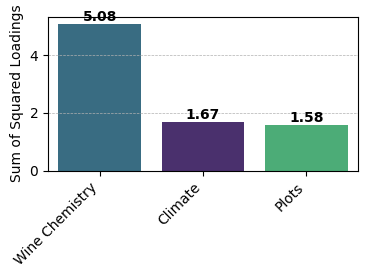

In [31]:
# Exclude Metabolites groups
filtered_loadings_df = variable_loadings_df[~variable_loadings_df["group"].isin(["Metabolites"])]

# Compute the total influence per group as the sum of squared loadings
group_influence = filtered_loadings_df.groupby("group")[["MFA Comp 1", "MFA Comp 2"]].apply(lambda x: (x**2).sum())

# Compute total influence per group
group_influence["Total Influence"] = group_influence["MFA Comp 1"] + group_influence["MFA Comp 2"]

# Sort groups by total influence
group_influence = group_influence.sort_values(by="Total Influence", ascending=False).reset_index()

# Define custom colors for each group
group_colors = {'Climate': '#482677FF', 'Wine Chemistry': '#2D718EFF', 'Plots': '#3CBC75FF'}
palette = [group_colors.get(group, "#808080") for group in group_influence["group"]]  # Default gray if not specified

# Plot
plt.figure(figsize=(4, 2))
ax = sns.barplot(data=group_influence, x="group", y="Total Influence", palette=palette)

# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Sum of Squared Loadings")
plt.title("")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()
